# Data integration and exploring

In [3]:
import pandas as pd
import numpy as np

dayahead = pd.read_parquet('processed_data/dayahead.parquet')
helen = pd.read_parquet('processed_data/helen.parquet')
tuulivoima = pd.read_parquet('processed_data/tuulivoima.parquet')
weather = pd.read_parquet('processed_data/weather.parquet')
consumption = pd.read_parquet('processed_data/consumption.parquet')

In [4]:
data = weather.join(helen).join(tuulivoima).join(dayahead).join(consumption)
data = data.drop(columns=['time','clouds', 'time zone', 'rain intensitety'])
data.head()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,Consumption_MWh
datetime,,,,,,,,,,,,,
2019-01-01 00:00:00,2019,1,1,1000.9,0.9,97.0,0.8,7.9,0,1063.619950,1427.0,10.07,10152.0
2019-01-01 01:00:00,2019,1,1,998.7,2.2,97.0,1.5,8.5,1,1052.205482,1352.0,10.03,9920.0
2019-01-01 02:00:00,2019,1,1,996.6,1.7,98.0,2.0,9.8,2,1014.848148,1177.0,4.56,9845.0
2019-01-01 03:00:00,2019,1,1,994.2,0.3,98.0,2.4,8.9,3,1009.665530,1001.0,4.83,9913.0
2019-01-01 04:00:00,2019,1,1,992.0,0.4,98.0,2.5,7.6,4,1028.339021,826.0,8.09,10027.0


In [5]:
data.dtypes

year                 int64
month                int64
day                  int64
pressure           float64
rain               float64
humidity           float64
temperature        float64
wind               float64
hour                 int64
dh_MWh             float64
Wind_MWh           float64
price              float64
Consumption_MWh    float64
dtype: object

Let's add weekday number to the data to be able to see the weekly variation

In [6]:
data['weekday'] = data.index.day_of_week

# Weather and district heating

<AxesSubplot:title={'center':'Consumption'}, xlabel='datetime'>

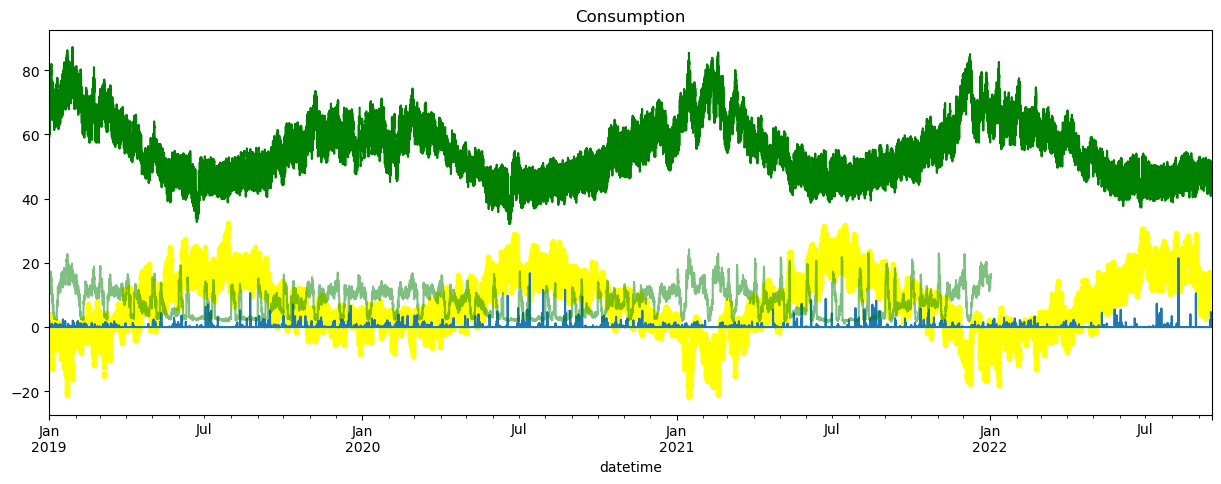

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
data.loc[:,'rain'].plot(ax=ax, style='-', figsize=(15,5), title='Temperature')
data.loc[:,'dh_MWh'].apply(lambda p: p * 0.01).plot(ax=ax, style='-', color='green', alpha=0.5, figsize=(15,5), title='Heating')
data.loc[:,'Consumption_MWh'].apply(lambda p: p * 0.006).plot(ax=ax, style='-', color='green', figsize=(15,5), title='Consumption')

# Short time look up - Wind power and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

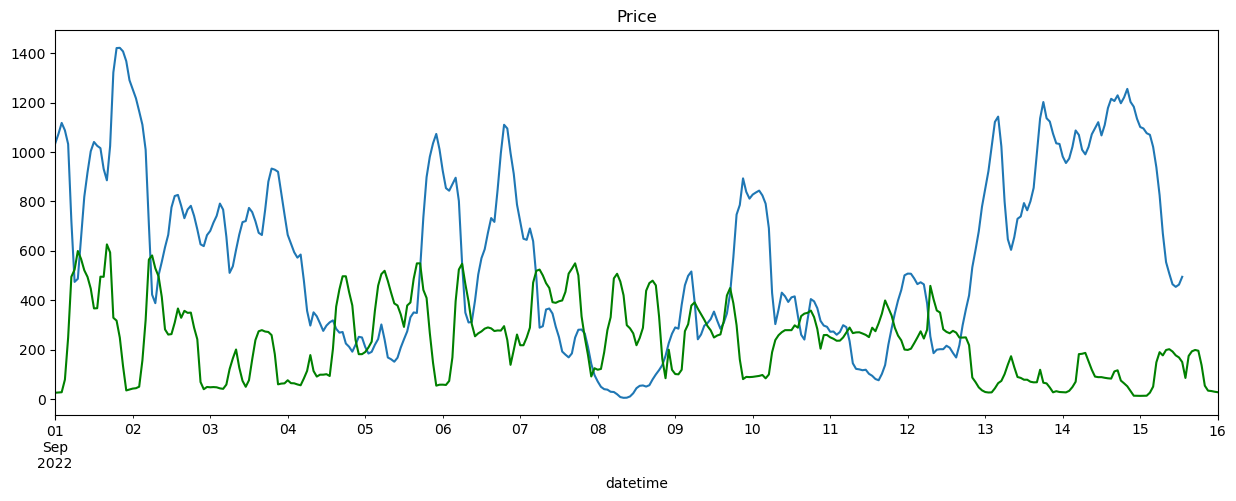

In [8]:
fig, ax = plt.subplots()

short_data = data['2022-09-01':]
#short_data.loc[:,'temperature'].plot(ax=ax, style='.', color='yellow', figsize=(15,5), title='Temperature')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Short time look up - air temperature, consumption and electricity price

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

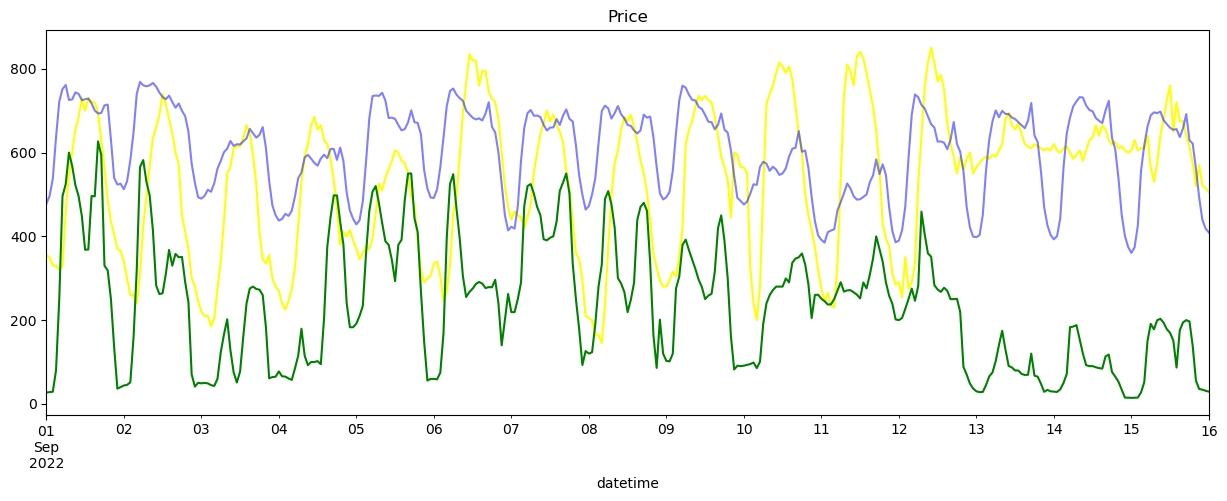

In [9]:
fig, ax = plt.subplots()


short_data = data['2022-09-01':]
short_data.loc[:,'temperature'].apply(lambda t: t*50).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
short_data.loc[:,'Consumption_MWh'].apply(lambda t: t*0.2-1000).plot(ax=ax, style='-', color='blue', alpha=0.5, figsize=(15,5), title='Consumption')
#short_data.loc[:,'humidity'].apply(lambda w: w * 0.5 -30 ).plot(ax=ax, style='-', figsize=(15,5), title='Rain')
#short_data.loc[:,'Wind_MWh'].apply(lambda w: w*0.5).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
#short_data.loc[:,'wind'].apply(lambda w: w*50).plot(ax=ax, style='-', figsize=(15,5), title='Wind')
short_data.loc[:,'price'].plot(ax=ax, style='-', color='green', figsize=(15,5), title='Price')


# Long term look up - electricity price and temperature

It seems that there may be a correlation between air temperature and electricity price. Let's take a look for the long term data.

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

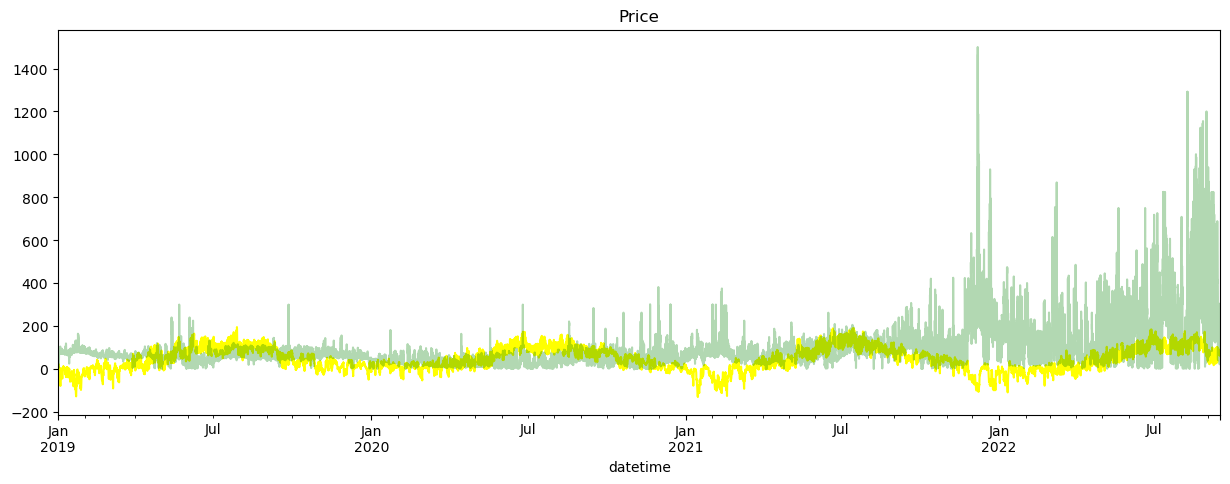

In [10]:
fig, ax = plt.subplots()

data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

### Crisis affecting the data

You can see clearly that the world crisis are affecting to the price. Let's take a look for the long term data from 2019-2021, i.e. from more static state, to get to see the normal variance of the price and temperature.

<AxesSubplot:title={'center':'Price'}, xlabel='datetime'>

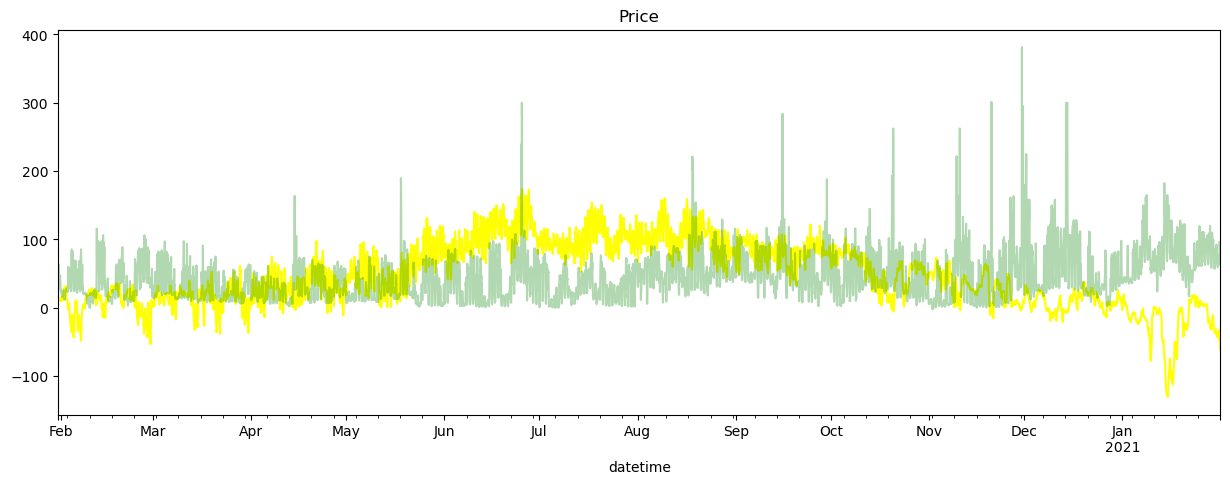

In [11]:
fig, ax = plt.subplots()


short_data = data['2020-01-31':'2021-01-31']

short_data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
short_data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

### Look up the seasonal variance of the price of electricity

There may be seasonal variance in the prices, so next we look up the data per month, per weekday and per day.

<AxesSubplot:xlabel='month', ylabel='price'>

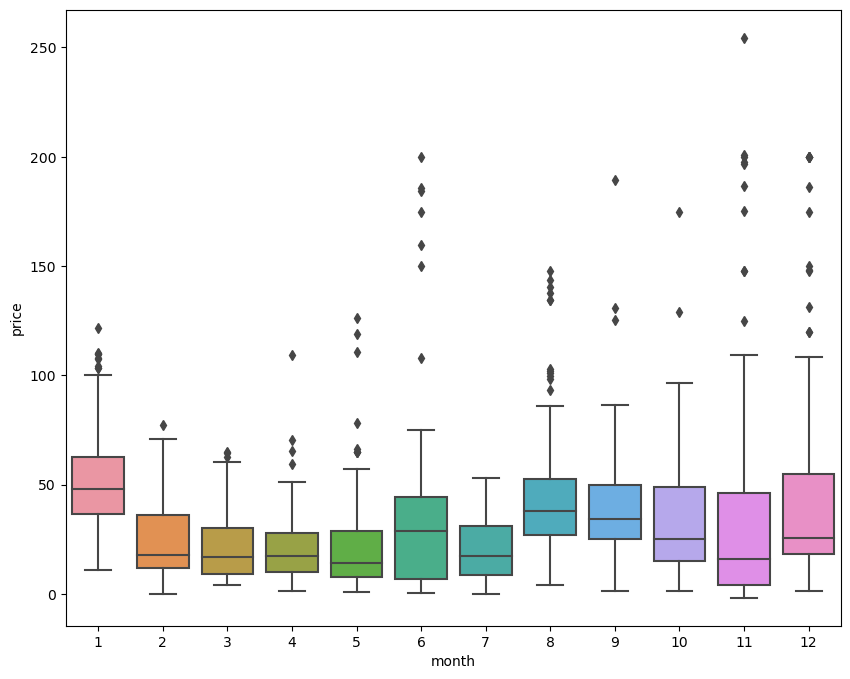

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='month', y='price')

<AxesSubplot:xlabel='weekday', ylabel='price'>

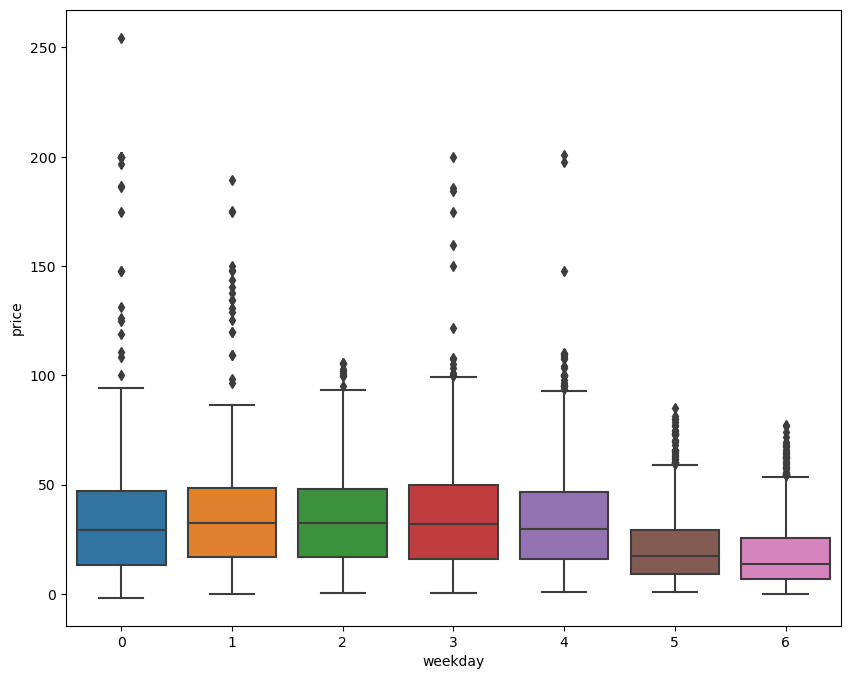

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='weekday', y='price')

<AxesSubplot:xlabel='hour', ylabel='price'>

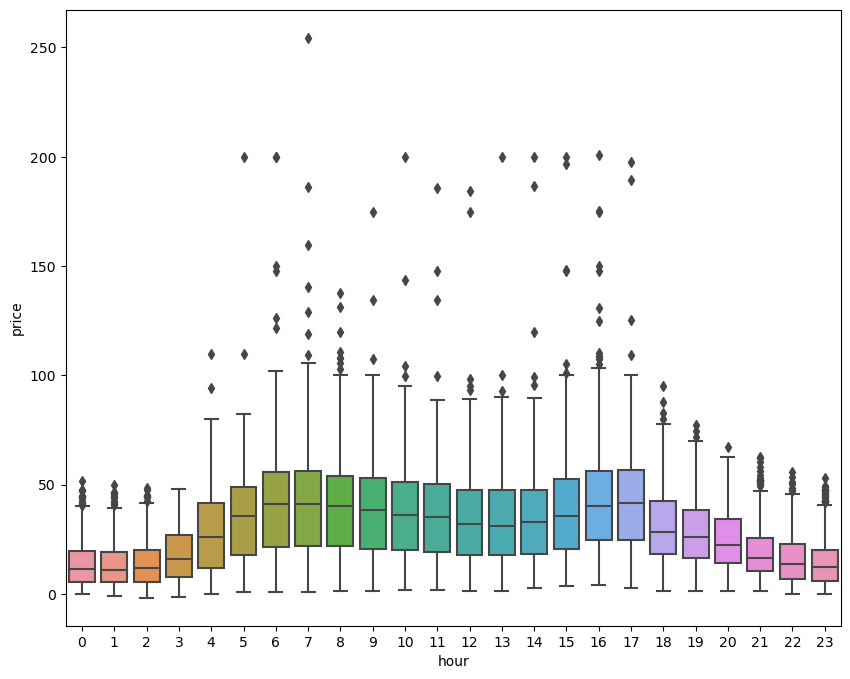

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=short_data, x='hour', y='price')

In [15]:
short_data.describe()

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,Consumption_MWh,weekday
count,8808.000000,8808.000000,8808.000000,8801.000000,8752.000000,8801.000000,8802.000000,8795.000000,8808.00000,8808.000000,8776.000000,8808.000000,8776.000000,8808.000000
mean,2020.084469,6.498638,15.798365,1011.298466,0.099977,78.006590,7.845376,4.685253,11.50000,751.025365,775.503418,30.047936,9015.833979,3.016349
std,0.278105,3.458689,8.835822,11.132685,0.484227,17.781565,7.879148,2.113628,6.92258,408.319002,544.063019,22.576108,1448.437932,2.001409
min,2020.000000,1.000000,1.000000,964.200000,0.000000,18.000000,-21.800000,0.000000,0.00000,178.832897,-3.000000,-1.730000,5341.000000,0.000000
25%,2020.000000,3.000000,8.000000,1004.600000,0.000000,67.000000,1.900000,3.250000,5.75000,340.786942,320.750000,12.837500,7950.000000,1.000000
50%,2020.000000,7.000000,16.000000,1012.300000,0.000000,84.000000,6.900000,4.400000,11.50000,766.767366,643.500000,25.840000,8862.000000,3.000000
75%,2020.000000,10.000000,23.000000,1019.200000,0.000000,92.000000,14.100000,5.800000,17.25000,1069.564502,1167.000000,44.042500,10111.000000,5.000000
max,2021.000000,12.000000,31.000000,1041.700000,16.800000,100.000000,28.900000,15.100000,23.00000,2422.537673,2188.000000,254.440000,14239.000000,6.000000


# XGBoost test with old data

Let's try how the XGBoost library works with our data. First we try with two variables, price and temperature. We split the data to the train and test sets, the test set to be about 3 months in the end of the time series.

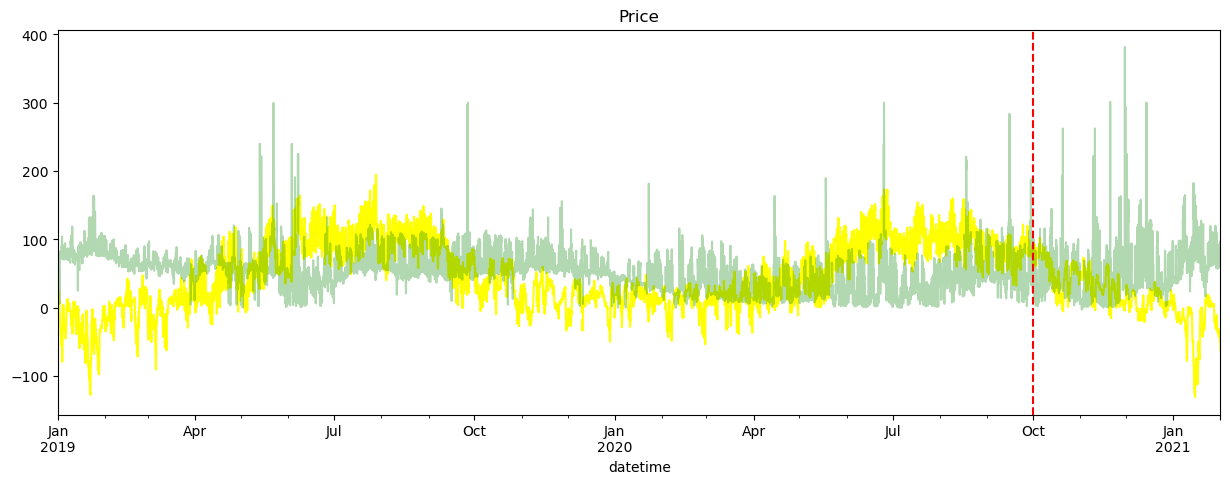

In [16]:
fig, ax = plt.subplots()

#select data before war crisis to get more static data set for testing
old_data = data['2019-01-01':'2021-01-31']
old_data.loc[:,'temperature'].apply(lambda t: t*6).plot(ax=ax, style='-', color='yellow', figsize=(15,5), title='Temperature')
old_data.loc[:,'price'].apply(lambda t: t*1.5).plot(ax=ax, style='-', alpha=0.3, color='green', figsize=(15,5), title='Price')

#split train and test data sets
old_train = old_data[:'2020-09-30']
old_test = old_data['2020-10-1':]

#draw the splitting line to the plot
ax.axvline('2020-10-01', color='red', ls='--')

In [17]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

old_train = old_train.copy()
old_test = old_test.copy()
features = ['hour', 'weekday', 'month', 'temperature']
target = 'price'

X_train = old_train[features]
y_train = old_train[target]
X_test = old_test[features]
y_test = old_test[target]

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=True)


[21:19:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:29.93368	validation_1-rmse:34.81880
[1]	validation_0-rmse:22.93147	validation_1-rmse:28.40148
[2]	validation_0-rmse:18.46078	validation_1-rmse:25.23203
[3]	validation_0-rmse:15.71382	validation_1-rmse:23.62071
[4]	validation_0-rmse:14.08433	validation_1-rmse:23.15561
[5]	validation_0-rmse:13.16054	validation_1-rmse:23.06838
[6]	validation_0-rmse:12.53299	validation_1-rmse:23.10788
[7]	validation_0-rmse:12.18063	validation_1-rmse:23.25396
[8]	validation_0-rmse:11.96682	validation_1-rmse:23.27196
[9]	validation_0-rmse:11.84121	validation_

/home/sakorpi/.conda/envs/conda-ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-rmse:11.34456	validation_1-rmse:23.48294
[17]	validation_0-rmse:11.27070	validation_1-rmse:23.52760
[18]	validation_0-rmse:11.17362	validation_1-rmse:23.54814
[19]	validation_0-rmse:11.15508	validation_1-rmse:23.56278
[20]	validation_0-rmse:11.12134	validation_1-rmse:23.57214
[21]	validation_0-rmse:11.05850	validation_1-rmse:23.58307
[22]	validation_0-rmse:11.00193	validation_1-rmse:23.59681
[23]	validation_0-rmse:10.97666	validation_1-rmse:23.55796
[24]	validation_0-rmse:10.96330	validation_1-rmse:23.56226
[25]	validation_0-rmse:10.92313	validation_1-rmse:23.59524
[26]	validation_0-rmse:10.88355	validation_1-rmse:23.57927
[27]	validation_0-rmse:10.82723	validation_1-rmse:23.55508
[28]	validation_0-rmse:10.81815	validation_1-rmse:23.52946
[29]	validation_0-rmse:10.80604	validation_1-rmse:23.53210
[30]	validation_0-rmse:10.76602	validation_1-rmse:23.52323
[31]	validation_0-rmse:10.75933	validation_1-rmse:23.53035
[32]	validation_0-rmse:10.72110	validation_1-rmse:23.509

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

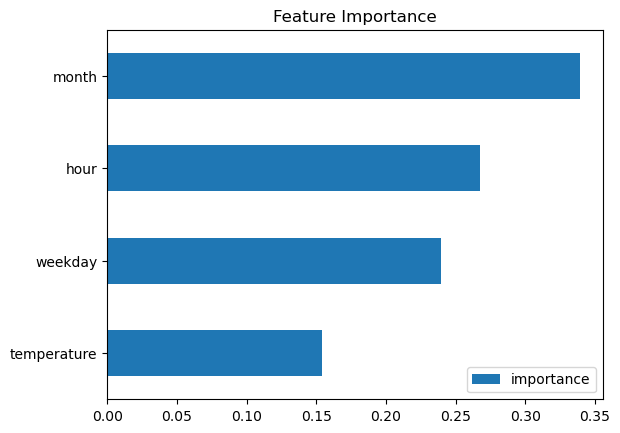

In [18]:


fi = pd.DataFrame(data=reg.feature_importances_,
             index=features,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()



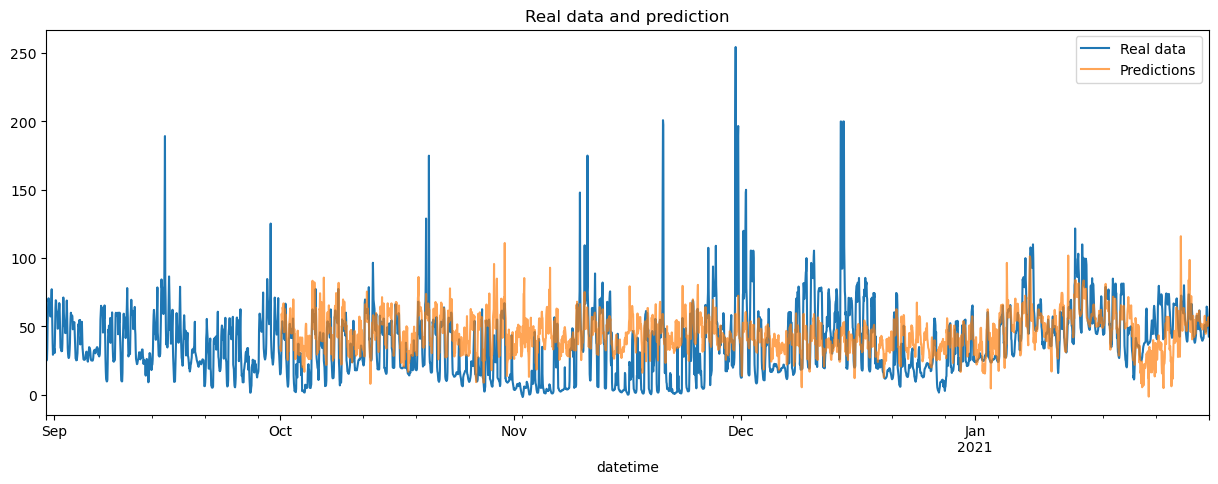

In [19]:
results = old_data.copy()
old_test['prediction'] = reg.predict(X_test)
results = results.merge(old_test[['prediction']], how='left', left_index=True, right_index=True).loc['2020-08-31':]
ax = results[['price']].plot(figsize=(15, 5))
results['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

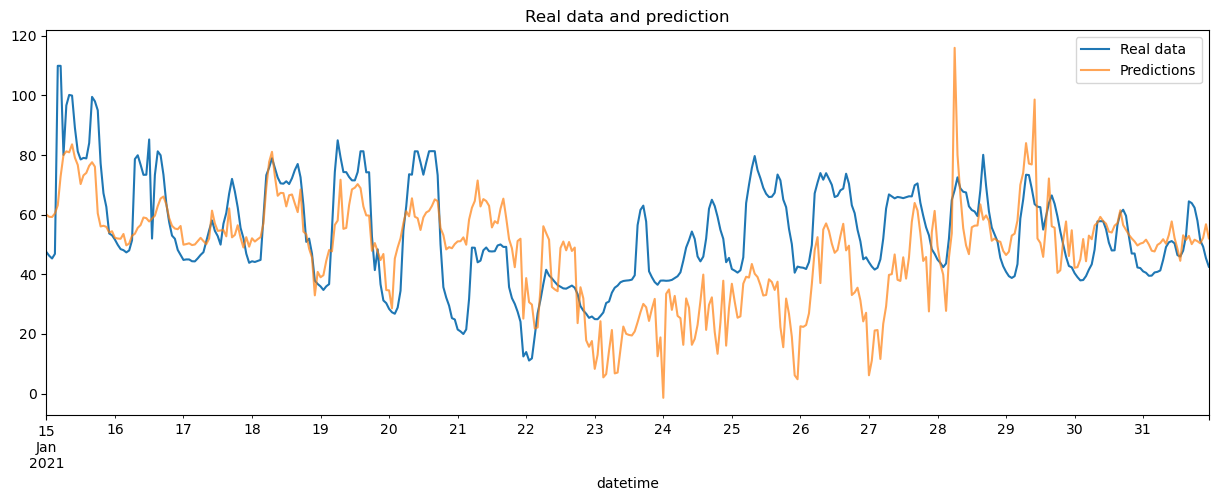

In [20]:
# plot short time results
short_res = results['2021-01-15':]
ax = short_res[['price']].plot(figsize=(15, 5))
short_res['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

#### Results of first learning test

With this model feature 'month' is used the most to predict the price. The RMSE value is also telling us that the models is overfitting a bit. The results looks like the prediction is a bit higher than the actual price.

Let's try to learn another model. This time we use more features and try not to overfit the model.

In [21]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

old_train2 = old_train.copy()
old_test2 = old_test.copy()
features2 = ['hour', 'weekday', 'month', 'temperature', 'pressure', 'rain', 'humidity', 'dh_MWh', 'Wind_MWh']
target = 'price'

X_train2 = old_train2[features2]
y_train2 = old_train2[target]
X_test2 = old_test2[features2]
y_test2 = old_test2[target]

#add max_depth and learning_rate to not overfit the model

reg2 = xgb.XGBRegressor(n_estimators=1000, max_depth=4, early_stopping_rounds=50, learning_rate=0.02)
reg2.fit(X_train2, y_train2, 
        eval_set=[(X_train2, y_train2),(X_test2, y_test2)],
        verbose=True)

[21:19:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:39.84336	validation_1-rmse:45.07659
[1]	validation_0-rmse:39.15368	validation_1-rmse:44.38296
[2]	validation_0-rmse:38.47961	validation_1-rmse:43.71078
[3]	validation_0-rmse:37.81802	validation_1-rmse:43.03083
[4]	validation_0-rmse:37.17356	validation_1-rmse:42.38880
[5]	validation_0-rmse:36.54383	validation_1-rmse:41.77545
[6]	validation_0-rmse:35.92824	validation_1-rmse:41.16575
[7]	validation_0-rmse:35.32744	validation_1-rmse:40.59028
[8]	validation_0-rmse:34.73996	validation_1-rmse:40.01277
[9]	validation_0-rmse:34.16093	validation_

/home/sakorpi/.conda/envs/conda-ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-rmse:27.35552	validation_1-rmse:32.85741
[24]	validation_0-rmse:26.95315	validation_1-rmse:32.51700
[25]	validation_0-rmse:26.55197	validation_1-rmse:32.10951
[26]	validation_0-rmse:26.16054	validation_1-rmse:31.71246
[27]	validation_0-rmse:25.77948	validation_1-rmse:31.36872
[28]	validation_0-rmse:25.41123	validation_1-rmse:31.04297
[29]	validation_0-rmse:25.05564	validation_1-rmse:30.74528
[30]	validation_0-rmse:24.70525	validation_1-rmse:30.40586
[31]	validation_0-rmse:24.36746	validation_1-rmse:30.12600
[32]	validation_0-rmse:24.03405	validation_1-rmse:29.81070
[33]	validation_0-rmse:23.70487	validation_1-rmse:29.52844
[34]	validation_0-rmse:23.38994	validation_1-rmse:29.27555
[35]	validation_0-rmse:23.08067	validation_1-rmse:28.98939
[36]	validation_0-rmse:22.77566	validation_1-rmse:28.73419
[37]	validation_0-rmse:22.48462	validation_1-rmse:28.51411
[38]	validation_0-rmse:22.19813	validation_1-rmse:28.27849
[39]	validation_0-rmse:21.92362	validation_1-rmse:28.068

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

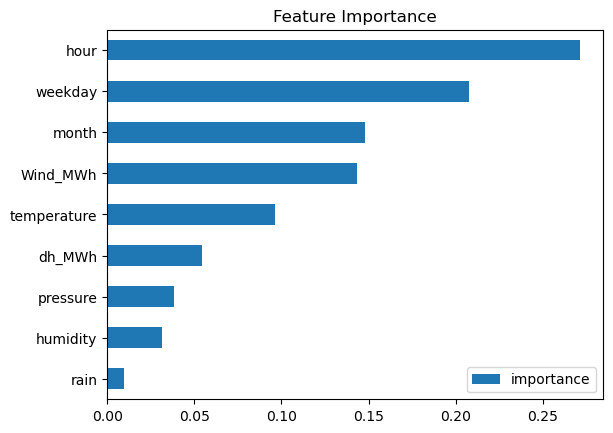

In [22]:


fi2 = pd.DataFrame(data=reg2.feature_importances_,
             index=features2,
             columns=['importance'])
fi2.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


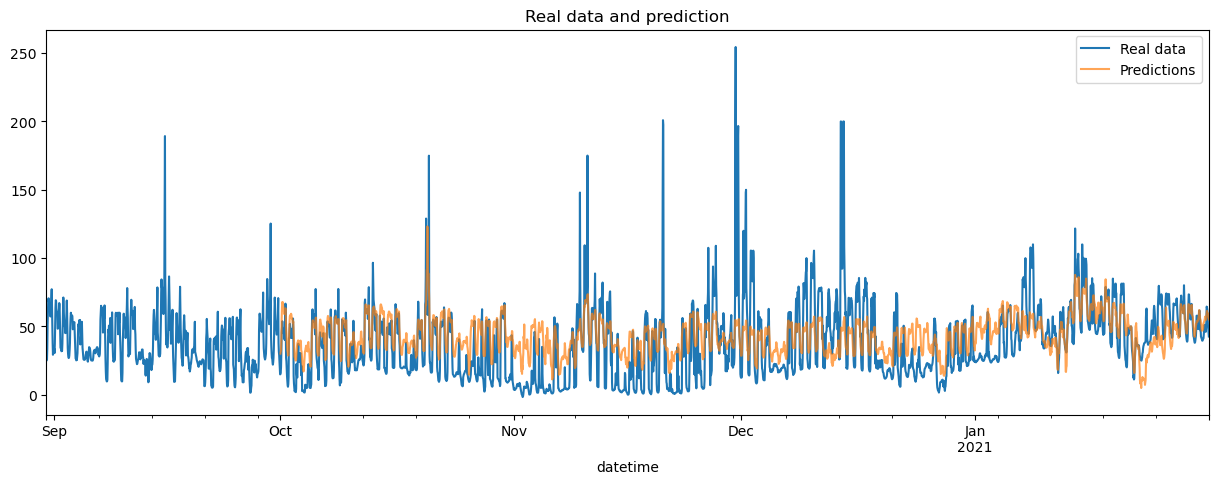

In [23]:
# Predict from the model
results2 = old_data.copy()
old_test2['prediction'] = reg2.predict(X_test2)
results2 = results2.merge(old_test2[['prediction']], how='left', left_index=True, right_index=True).loc['2020-08-31':]

# plot results
ax = results2[['price']].plot(figsize=(15, 5))
results2['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

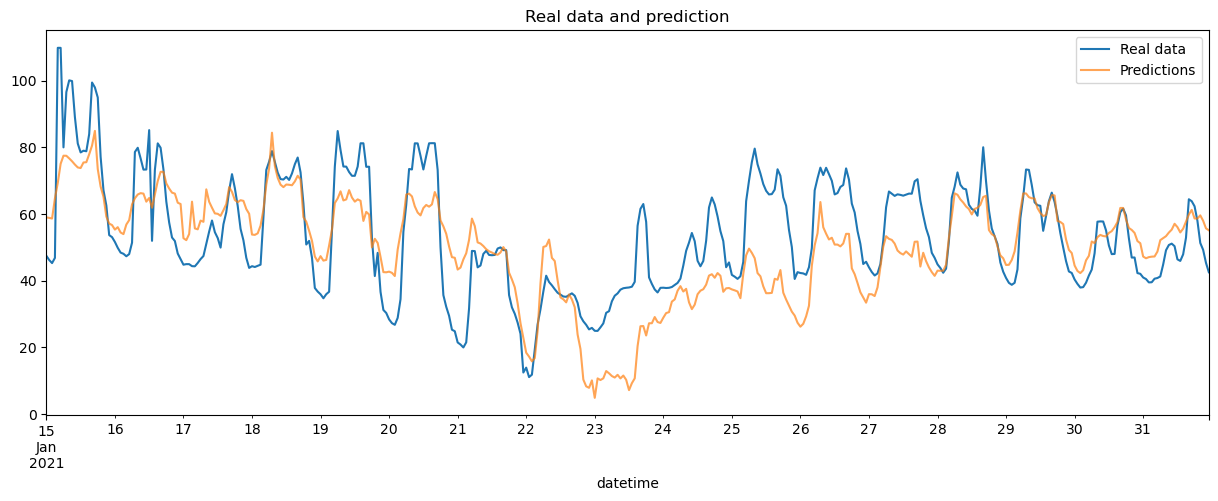

In [24]:
# plot short time results
short_res2 = results2['2021-01-15':]
ax = short_res2[['price']].plot(figsize=(15, 5))
short_res2['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

In [25]:
#calculate abosulte value of the difference to see the biggest and smallest differencies

results2['abs_error'] = abs(results2['price']-results2['prediction'])

results2.nlargest(10, 'abs_error', keep='first')

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,Consumption_MWh,weekday,prediction,abs_error
datetime,,,,,,,,,,,,,,,,
2020-11-30 07:00:00,2020,11,30,1020.1,0.1,96.0,0.1,3.5,7,1284.303165,1019.0,254.44,10964.0,0,54.617241,199.822759
2020-12-14 05:00:00,2020,12,14,1019.5,0.0,78.0,-1.3,1.9,5,1336.030185,112.0,199.96,11162.0,0,46.069649,153.890351
2020-12-14 13:00:00,2020,12,14,1019.9,0.0,82.0,-0.9,2.2,13,1332.721562,163.0,199.94,11596.0,0,47.370686,152.569314
2020-12-14 06:00:00,2020,12,14,1019.7,0.0,77.0,-1.1,2.1,6,1358.241423,126.0,199.93,11420.0,0,49.091969,150.838031
2020-11-20 16:00:00,2020,11,20,1012.4,0.0,91.0,1.2,4.9,16,1184.231450,1599.0,200.89,11039.0,4,51.046768,149.843232
2020-12-14 14:00:00,2020,12,14,1019.8,0.0,83.0,-0.9,3.3,14,1343.636010,188.0,199.97,11654.0,0,53.313908,146.656092
2020-11-20 17:00:00,2020,11,20,1013.6,0.0,92.0,0.7,5.8,17,1193.207968,1376.0,197.40,11046.0,4,51.884674,145.515326
2020-11-30 06:00:00,2020,11,30,1020.4,0.1,96.0,0.0,3.6,6,1273.367900,1031.0,200.06,10878.0,0,54.604973,145.455027
2020-12-14 15:00:00,2020,12,14,1019.8,0.0,85.0,-0.9,1.3,15,1319.858743,203.0,199.91,11542.0,0,54.470303,145.439697


In [26]:
results2.nsmallest(10, 'abs_error', keep='first')

,year,month,day,pressure,rain,humidity,temperature,wind,hour,dh_MWh,Wind_MWh,price,Consumption_MWh,weekday,prediction,abs_error
datetime,,,,,,,,,,,,,,,,
2020-12-29 12:00:00,2020,12,29,1004.6,0.0,91.0,1.1,7.7,12,1279.718674,791.0,47.50,10714.0,1,47.508484,0.008484
2020-10-19 15:00:00,2020,10,19,1004.3,0.0,82.0,2.4,3.9,15,1067.688766,1082.0,49.92,10121.0,0,49.889774,0.030226
2020-10-30 15:00:00,2020,10,30,1015.1,0.4,99.0,8.7,0.8,15,752.724842,201.0,61.78,10169.0,4,61.824986,0.044986
2021-01-14 21:00:00,2021,1,14,1021.1,0.0,80.0,-20.5,4.7,21,2023.680088,240.0,62.01,13334.0,3,61.963181,0.046819
2020-10-09 17:00:00,2020,10,9,1009.2,0.0,90.0,11.7,5.9,17,471.508338,1241.0,54.57,9136.0,4,54.516838,0.053162
2021-01-13 04:00:00,2021,1,13,1007.7,NaN,92.0,-1.6,10.2,4,1358.900718,1902.0,36.81,11959.0,2,36.868835,0.058835
2020-11-20 21:00:00,2020,11,20,1018.1,0.0,94.0,-0.1,6.1,21,1098.514929,579.0,36.60,10456.0,4,36.669212,0.069212
2020-11-30 19:00:00,2020,11,30,1015.0,0.0,80.0,1.8,4.2,19,1101.839488,1052.0,42.85,10363.0,0,42.955860,0.105860
2020-11-28 02:00:00,2020,11,28,1023.6,0.0,79.0,0.8,4.3,2,1011.772103,116.0,33.23,9016.0,5,33.096813,0.133187


#### Results of the second learning test

This model seems to work better. It takes more account the short term changes in the price, like daily and weekly variations. The prediction results are also closer to the real data than in the first test. Also the cold season in december 2021 is not noticed in either test prediction. That is maybe because the winter 2020 was very warm and from 2019 december we don't have any data. 
Now let's add consumption data into learning features.

[21:20:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:39.82643	validation_1-rmse:45.09127
[1]	validation_0-rmse:39.11773	validation_1-rmse:44.37865
[2]	validation_0-rmse:38.42429	validation_1-rmse:43.67809
[3]	validation_0-rmse:37.74747	validation_1-rmse:43.02715
[4]	validation_0-rmse:37.07410	validation_1-rmse:42.33355
[5]	validation_0-rmse:36.42094	validation_1-rmse:41.69795
[6]	validation_0-rmse:35.78100	validation_1-rmse:41.08202
[7]	validation_0-rmse:35.15573	validation_1-rmse:40.48026
[8]	validation_0-rmse:34.54931	validation_1-rmse:39.91001
[9]	validation_0-rmse:33.94580	validation_

/home/sakorpi/.conda/envs/conda-ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-rmse:31.14105	validation_1-rmse:36.68397
[15]	validation_0-rmse:30.61700	validation_1-rmse:36.20558
[16]	validation_0-rmse:30.10972	validation_1-rmse:35.74740
[17]	validation_0-rmse:29.60376	validation_1-rmse:35.25887
[18]	validation_0-rmse:29.11336	validation_1-rmse:34.82473
[19]	validation_0-rmse:28.63304	validation_1-rmse:34.39743
[20]	validation_0-rmse:28.16831	validation_1-rmse:33.99536
[21]	validation_0-rmse:27.70315	validation_1-rmse:33.60937
[22]	validation_0-rmse:27.25488	validation_1-rmse:33.23344
[23]	validation_0-rmse:26.82009	validation_1-rmse:32.86572
[24]	validation_0-rmse:26.39646	validation_1-rmse:32.51192
[25]	validation_0-rmse:25.97149	validation_1-rmse:32.16970
[26]	validation_0-rmse:25.56191	validation_1-rmse:31.82761
[27]	validation_0-rmse:25.16734	validation_1-rmse:31.50692
[28]	validation_0-rmse:24.77665	validation_1-rmse:31.20104
[29]	validation_0-rmse:24.39196	validation_1-rmse:30.85907
[30]	validation_0-rmse:24.01881	validation_1-rmse:30.573

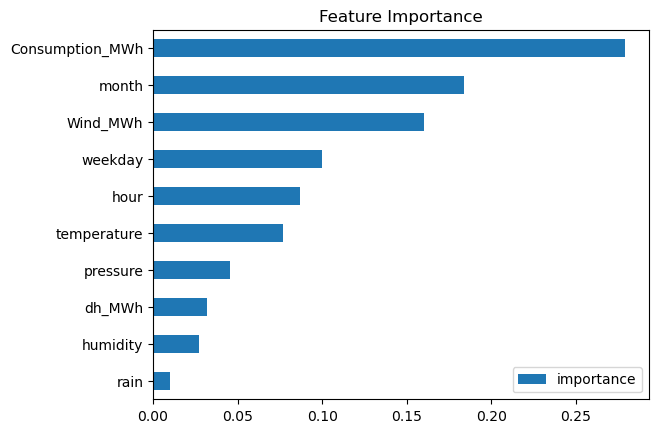

In [28]:
old_train3 = old_train.copy()
old_test3= old_test.copy()
features3 = ['hour', 'weekday', 'month', 'temperature', 'pressure', 'rain', 'humidity', 'dh_MWh', 'Wind_MWh', 'Consumption_MWh']
target = 'price'

X_train3 = old_train3[features3]
y_train3 = old_train3[target]
X_test3 = old_test3[features3]
y_test3 = old_test3[target]


reg3 = xgb.XGBRegressor(n_estimators=1000, max_depth=5, early_stopping_rounds=50, learning_rate=0.02)
reg3.fit(X_train3, y_train3, 
        eval_set=[(X_train3, y_train3),(X_test3, y_test3)],
        verbose=True)


fi3 = pd.DataFrame(data=reg3.feature_importances_,
             index=features3,
             columns=['importance'])
fi3.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

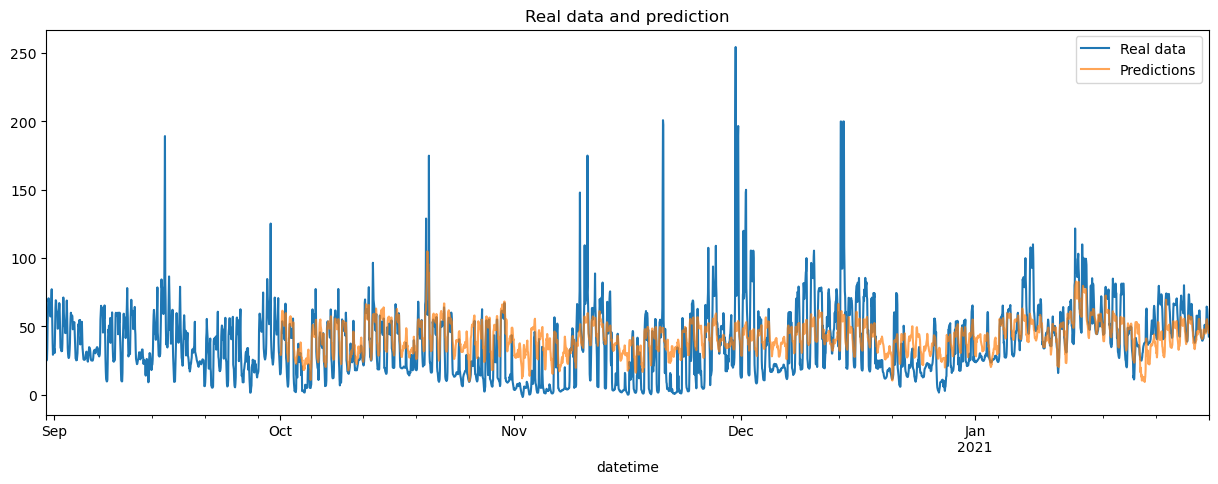

In [29]:

# Predict from the model
results3 = old_data.copy()
old_test3['prediction'] = reg3.predict(X_test3)
results3 = results3.merge(old_test3[['prediction']], how='left', left_index=True, right_index=True).loc['2020-08-31':]

# plot results
ax = results3[['price']].plot(figsize=(15, 5))
results3['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions'])
ax.set_title('Real data and prediction')
plt.show()

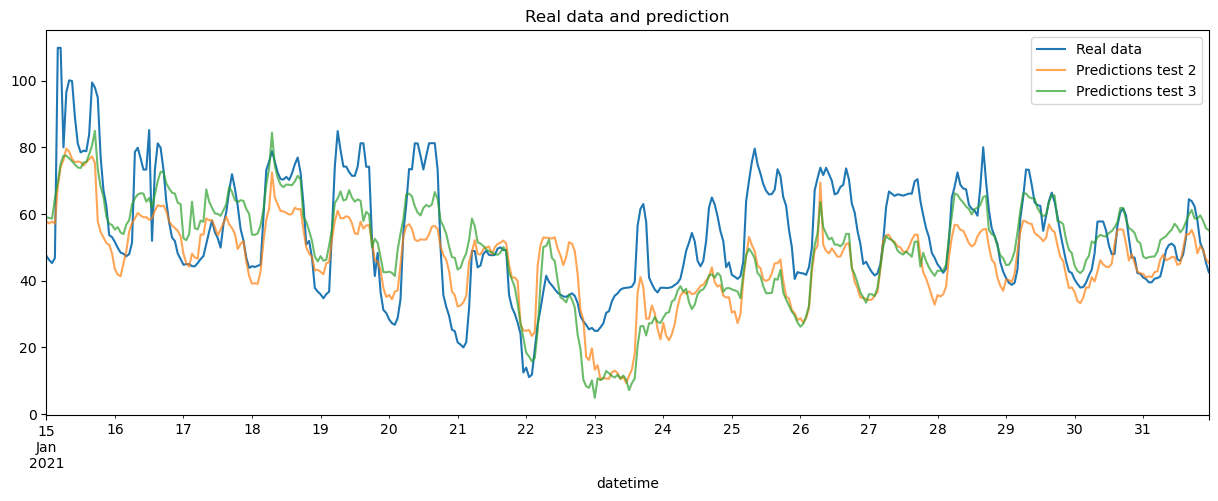

In [30]:
# plot short time results
short_res3 = results3['2021-01-15':]
ax = short_res3[['price']].plot(figsize=(15, 5))
short_res3['prediction'].plot(ax=ax, style='-', alpha=0.7)
short_res2['prediction'].plot(ax=ax, style='-', alpha=0.7)
plt.legend(['Real data', 'Predictions test 2','Predictions test 3'])
ax.set_title('Real data and prediction')
plt.show()

#### Results of the third learning test

Electricity consumption is clearly the most correlating value in our features. But the short time prediction sample does not differ much from the second test.